# Regression Models with Keras


## Introduction


Keras is a high-level API for building deep learning models, popular for its ease of use and syntactic simplicity, which facilitate rapid development. As you will see in this lab and throughout this course, you can build very complex deep learning networks with just a few lines of code using Keras. You will appreciate the simplicity of Keras even more once you learn to build deep models using PyTorch and TensorFlow in other courses.

In this notebook, you will learn how to use the Keras library to build a regression model.


<h2>Regression Models with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build a regression model.</h5>
<h5> 2. Download and Clean dataset </h5>
<h5> 3. Build a Neural Network </h5>
<h5> 4. Train and Test the Network. </h5>     



Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [1]:
import pandas as pd
import numpy as np

## Dataset Description

The dataset contains information about the compressive strength of different samples of concrete based on the volumes of various ingredients used in their production. The ingredients included in the dataset are:

1. Cement
2. Blast Furnace Slag
3. Fly Ash
4. Water
5. Superplasticizer
6. Coarse Aggregate
7. Fine Aggregate


In [2]:
concrete_data = pd.read_csv('/content/concrete_data.csv')
concrete_data.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa.


In [3]:
concrete_data.shape

(1030, 9)

Let's check the dataset for any missing values.


In [4]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


# Split data into Train and Test


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [6]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [7]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [9]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* since we will need this number when building our network.


In [10]:
n_cols = predictors_norm.shape[1] # number of predictors

<a id="item1"></a>


<a id='item32'></a>


## Import Keras


In [11]:
import keras

In [12]:
from keras.models import Sequential
from keras.layers import Dense

<a id='item33'></a>


## Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [13]:
def regression_model():
    #create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    #compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

The above function create a model that has two hidden layers, each of 50 hidden units.


<a id="item4"></a>


<a id='item34'></a>


## Train and Test the Network


Let's call the function now to create our model.


In [14]:
# build the model
model = regression_model()

Next, we will train and test the model at the same time using the *fit* method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.


In [15]:
# fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 1620.5170 - val_loss: 1127.1184
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1481.9434 - val_loss: 1005.2154
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 1266.5460 - val_loss: 817.5587
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 959.8954 - val_loss: 579.4112
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 615.3355 - val_loss: 355.8092
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 360.9976 - val_loss: 217.3883
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 254.8043 - val_loss: 179.5751
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 228.7876 - val_loss: 174.3039
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 216.2532 - val_loss: 169.9973
Epoch 10/100
23/23 [==============================] - 0s 3ms/step -

### You can see that the amount of loss has gradually decreased.

Feel free to experiment with the following parameters and observe the impact on the model's performance:

1. **Increase or decrease the number of neurons in hidden layers**
2. **Add more hidden layers**
3. **Increase the number of epochs**

By varying these parameters, you can better understand how they affect the model's ability to learn and generalize from the data.


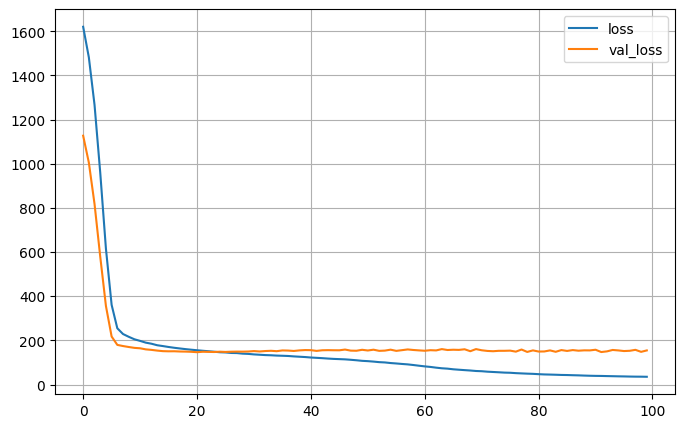

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# If using a Jupyter notebook, ensure inline plotting is enabled

%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [17]:
pd.DataFrame(history.history)

,loss,val_loss
0,1620.516968,1127.118408
1,1481.943359,1005.215393
2,1266.546021,817.558655
3,959.895447,579.411194
4,615.335510,355.809174
...,...,...
95,36.697186,151.627258
96,36.101894,152.810501
97,35.700279,157.129044
98,35.530804,148.061844
